In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# leitura dos dados
df_train  = pd.read_csv("C:\\Users\\pedro estofados\\Documents\\titanic\\train.csv")
df_test   = pd.read_csv("C:\\Users\\pedro estofados\\Documents\\titanic\\test.csv")

In [3]:
# exploração dos dados
print(df_train.head(10))

print("Valores nulos:")
print(df_train.isnull().sum())

print("Colunas:")
print(df_train.columns)
print("Tipos de dados de cada coluna:")
print(df_train.dtypes)
print("Describe:")
print(df_train.describe())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

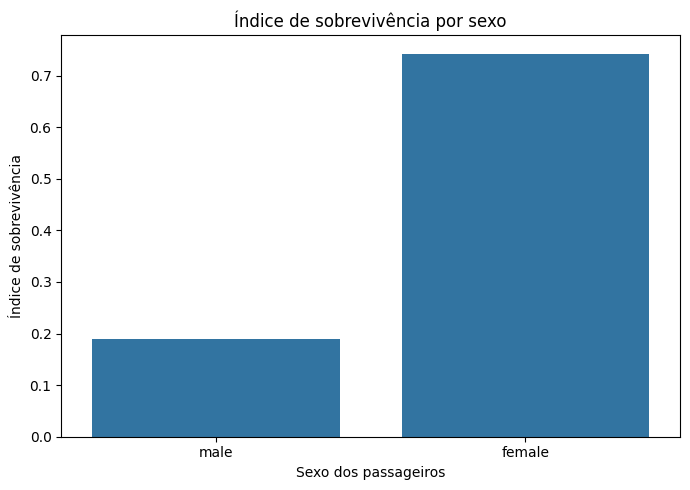

In [4]:
plt.figure(figsize=(7, 5))

sns.barplot(x='Sex', y='Survived', data=df_train, errorbar=None)
plt.title('Índice de sobrevivência por sexo')
plt.ylabel('Índice de sobrevivência')
plt.xlabel('Sexo dos passageiros')
plt.tight_layout()
plt.show()

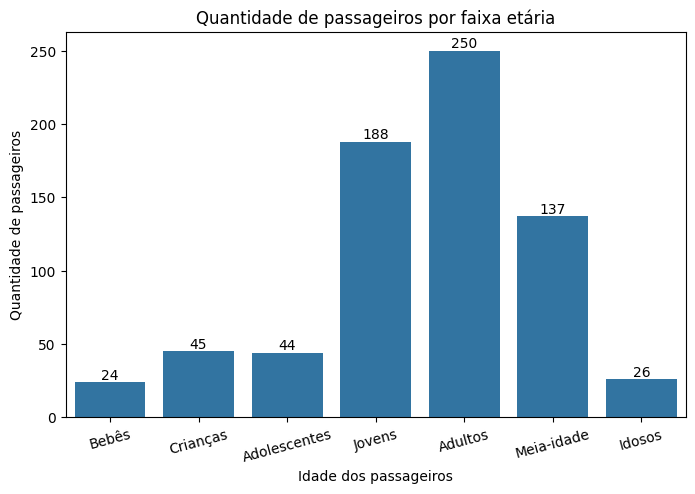

In [5]:
bins = [0, 2, 12, 17, 25, 39, 59, 100]
labels = ['Bebês', 'Crianças', 'Adolescentes', 'Jovens', 'Adultos', 'Meia-idade', 'Idosos']

df_train['faixa_etaria'] = pd.cut(
    df_train['Age'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x='faixa_etaria',
    data=df_train,
    order=['Bebês', 'Crianças', 'Adolescentes', 'Jovens', 'Adultos', 'Meia-idade', 'Idosos']
)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Quantidade de passageiros por faixa etária')
plt.ylabel('Quantidade de passageiros')
plt.xlabel('Idade dos passageiros')
plt.xticks(rotation=15)
plt.show()

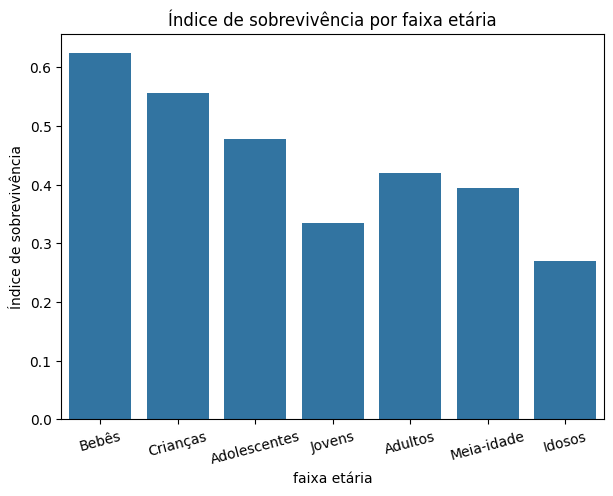

In [6]:
plt.figure(figsize=(7, 5))

sns.barplot(x='faixa_etaria', y='Survived', data=df_train, errorbar=None)
plt.title('Índice de sobrevivência por faixa etária')
plt.ylabel('Índice de sobrevivência')
plt.xlabel('faixa etária')
plt.xticks(rotation=15)
plt.show()

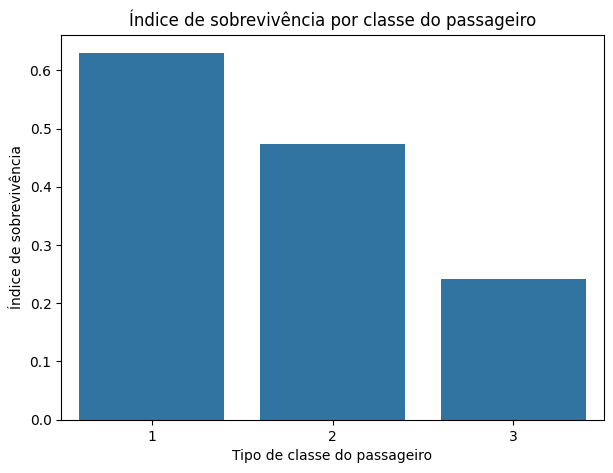

In [7]:
plt.figure(figsize=(7, 5))

sns.barplot(x='Pclass', y='Survived', data=df_train, errorbar=None)
plt.title('Índice de sobrevivência por classe do passageiro')
plt.ylabel('Índice de sobrevivência')
plt.xlabel('Tipo de classe do passageiro')
plt.show()

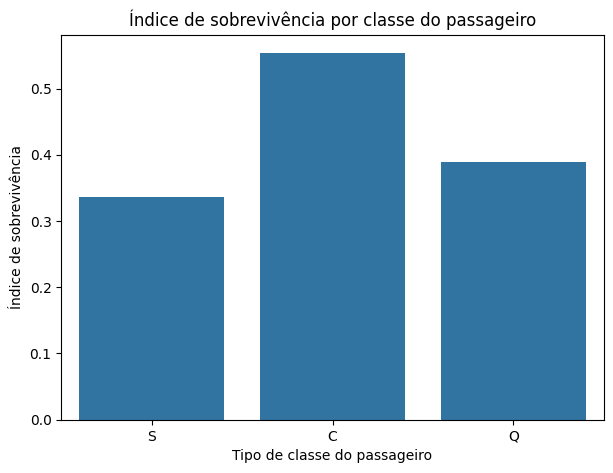

In [8]:
plt.figure(figsize=(7, 5))

sns.barplot(x='Embarked', y='Survived', data=df_train, errorbar=None)
plt.title('Índice de sobrevivência por classe do passageiro')
plt.ylabel('Índice de sobrevivência')
plt.xlabel('Tipo de classe do passageiro')
plt.show()

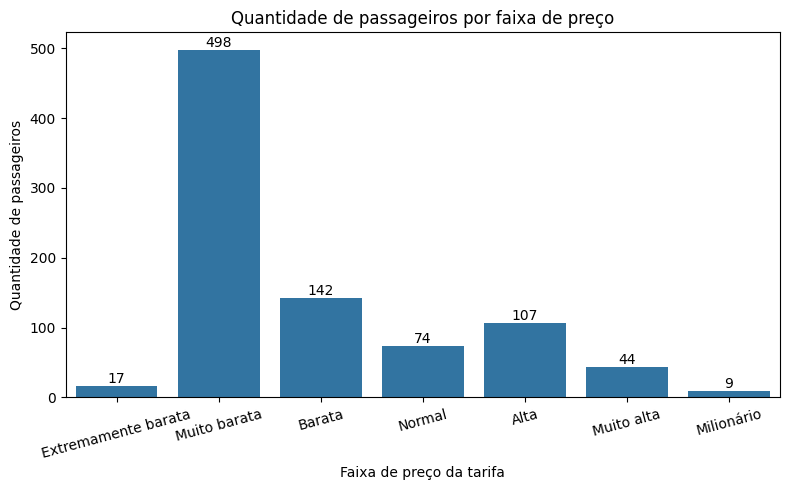

In [9]:
bins_fare = [0, 5, 20, 30, 50, 100, 250, df_train['Fare'].max()]
labels_fare = ['Extremamente barata', 'Muito barata', 'Barata', 'Normal', 'Alta', 'Muito alta', 'Milionário']

df_train['faixa_preco'] = pd.cut(
    df_train['Fare'],
    bins=bins_fare,
    labels=labels_fare,
    right=True,
    include_lowest=True
)

plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x='faixa_preco',
    data=df_train,
    order=labels_fare  
)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Quantidade de passageiros por faixa de preço')
plt.ylabel('Quantidade de passageiros')
plt.xlabel('Faixa de preço da tarifa')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

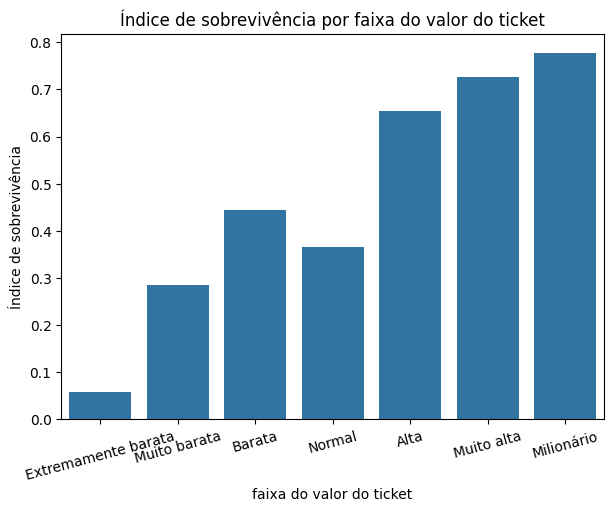

In [10]:
plt.figure(figsize=(7, 5))

sns.barplot(x='faixa_preco', y='Survived', data=df_train, errorbar=None)
plt.title('Índice de sobrevivência por faixa do valor do ticket')
plt.ylabel('Índice de sobrevivência')
plt.xlabel('faixa do valor do ticket')
plt.xticks(rotation=15)
plt.show()

In [12]:
# Feature engineering da base de treinamento

# Tratativa de campos nulos
print('Antes de substituir os nulos (Idade): ', df_train['Age'].isnull().sum())
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
print('Depois de substituir os nulos (Idade): ', df_train['Age'].isnull().sum()) 

Antes de substituir os nulos (Idade):  0
Depois de substituir os nulos (Idade):  0


In [13]:
# Começando com a categorização da faixa etária
df_train['Bebês'] = (df_train['Age'] <= 2)
df_train['Crianças'] = (df_train['Age'] > 2) & (df_train['Age'] <= 12)
df_train['Adolescentes'] = (df_train['Age'] > 12) & (df_train['Age'] <= 17)
df_train['Jovens'] = (df_train['Age'] > 17) & (df_train['Age'] <= 25)
df_train['Adultos'] = (df_train['Age'] > 25) & (df_train['Age'] <= 39)
df_train['Meia-idade'] = (df_train['Age'] > 39) & (df_train['Age'] <= 59)
df_train['Idosos'] = (df_train['Age'] > 59)

# Fazendo a categorização da tarifa
df_train['Extremamente barata'] = (df_train['Fare'] <= 5)
df_train['Muito barata'] = (df_train['Fare'] > 5) & (df_train['Fare'] <= 20)
df_train['Barata'] = (df_train['Fare'] > 20) & (df_train['Fare'] <= 30)
df_train['Normal'] = (df_train['Fare'] > 30) & (df_train['Fare'] <= 50)
df_train['Alta'] = (df_train['Fare'] > 50) & (df_train['Fare'] <= 100)
df_train['Muito alta'] = (df_train['Fare'] > 100) & (df_train['Fare'] <= 250)
df_train['Milionário'] = (df_train['Fare'] > 250)  

In [14]:
# One Hot encoding nas features categóricas
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)

# Scaling das features numéricas
features_numericas = ['Age', 'Fare', 'Parch', 'SibSp']
scaler = StandardScaler()
df_train[features_numericas] = scaler.fit_transform(df_train[features_numericas])

# Removi as features 'PassengerId', 'Survived', 'Name', 'Ticket', 'faixa_etaria', e 'Cabin', maioria deles por serem dados de identificação ou ser o target, e Cabin por ter maior parte de seus dados nulos
Colunas = ['Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'Bebês', 'Crianças',
       'Adolescentes', 'Jovens', 'Adultos', 'Meia-idade', 'Idosos', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Extremamente barata',
       'Muito barata', 'Barata', 'Normal', 'Alta', 'Muito alta', 'Milionário']

df_train_proc = df_train[Colunas].copy()

print(df_train_proc.head(15))
print(df_train_proc.describe())

    Pclass       Age     SibSp     Parch      Fare  Bebês  Crianças  \
0        3 -0.565736  0.432793 -0.473674 -0.502445  False     False   
1        1  0.663861  0.432793 -0.473674  0.786845  False     False   
2        3 -0.258337 -0.474545 -0.473674 -0.488854  False     False   
3        1  0.433312  0.432793 -0.473674  0.420730  False     False   
4        3  0.433312 -0.474545 -0.473674 -0.486337  False     False   
5        3 -0.104637 -0.474545 -0.473674 -0.478116  False     False   
6        1  1.893459 -0.474545 -0.473674  0.395814  False     False   
7        3 -2.102733  2.247470  0.767630 -0.224083   True     False   
8        3 -0.181487 -0.474545  2.008933 -0.424256  False     False   
9        2 -1.180535  0.432793 -0.473674 -0.042956  False     False   
10       3 -1.949034  0.432793  0.767630 -0.312172  False      True   
11       1  2.200858 -0.474545 -0.473674 -0.113846  False     False   
12       3 -0.719436 -0.474545 -0.473674 -0.486337  False     False   
13    

In [15]:
# Feature engineering da base de teste

# Tratativa de campos nulos
print('Antes de substituir os nulos (Idade): ', df_test['Age'].isnull().sum())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
print('Depois de substituir os nulos (Idade): ', df_test['Age'].isnull().sum())

print('Antes de substituir os nulos (Embarked): ', df_test['Embarked'].isnull().sum())
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
print('Depois de substituir os nulos (Embarked): ', df_test['Embarked'].isnull().sum())  

Antes de substituir os nulos (Idade):  86
Depois de substituir os nulos (Idade):  0
Antes de substituir os nulos (Embarked):  0
Depois de substituir os nulos (Embarked):  0


In [16]:
# Começando com a categorização da faixa etária na base de testes
df_test['Bebês'] = (df_test['Age'] <= 2)
df_test['Crianças'] = (df_test['Age'] > 2) & (df_test['Age'] <= 12)
df_test['Adolescentes'] = (df_test['Age'] > 12) & (df_test['Age'] <= 17)
df_test['Jovens'] = (df_test['Age'] > 17) & (df_test['Age'] <= 25)
df_test['Adultos'] = (df_test['Age'] > 25) & (df_test['Age'] <= 39)
df_test['Meia-idade'] = (df_test['Age'] > 39) & (df_test['Age'] <= 59)
df_test['Idosos'] = (df_test['Age'] > 59)

# Fazendo a categorização da tarifa na base de testes
df_test['Extremamente barata'] = (df_test['Fare'] <= 5)
df_test['Muito barata'] = (df_test['Fare'] > 5) & (df_test['Fare'] <= 20)
df_test['Barata'] = (df_test['Fare'] > 20) & (df_test['Fare'] <= 30)
df_test['Normal'] = (df_test['Fare'] > 30) & (df_test['Fare'] <= 50)
df_test['Alta'] = (df_test['Fare'] > 50) & (df_test['Fare'] <= 100)
df_test['Muito alta'] = (df_test['Fare'] > 100) & (df_test['Fare'] <= 250)
df_test['Milionário'] = (df_test['Fare'] > 250)  

In [ ]:
# One Hot encoding nas features categóricas
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True)

# Scaling das features numéricas
features_numericas = ['Age', 'Fare', 'Parch', 'SibSp']
scaler = StandardScaler()
df_test[features_numericas] = scaler.fit_transform(df_test[features_numericas])

# Removi as features 'PassengerId', 'Survived', 'Name', 'faixa_etaria', 'Ticket' e 'Cabin', maioria deles por serem dados de identificação ou ser o target, e Cabin por ter maior parte de seus dados nulos
Colunas = ['Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'Bebês', 'Crianças',
       'Adolescentes', 'Jovens', 'Adultos', 'Meia-idade', 'Idosos', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Extremamente barata',
       'Muito barata', 'Barata', 'Normal', 'Alta', 'Muito alta', 'Milionário']

df_test_proc = df_test[Colunas].copy()

print(df_test_proc.head(15))
print(df_test_proc.describe())

In [ ]:
# Aplicando os modelos e train_test_split

# Definição das variáveis
X = df_train_proc 
y = df_train['Survived']

# Aplicação do train_test_split usando a medida de 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Aplicando Random Forest (método de ensemble que usa bagging)
rf_modelo = RandomForestClassifier(n_estimators=100, random_state=42)
rf_modelo.fit(X_train, y_train)
rf_preds = rf_modelo.predict(X_test)

# Aplicando Gradient Boosting (método de ensemble que usa boosting)
gb_modelo = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_modelo.fit(X_train, y_train)
gb_preds = gb_modelo.predict(X_test)

# Avaliação do modelo usando a base de treinamento
print("Random Forest:")
print("Porcentagem de acertos: ", accuracy_score(y_test, rf_preds))
print("Matriz de confusão: \n", confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("\nGradient Boosting: ")
print("Porcentagem de acertos: ", accuracy_score(y_test, gb_preds))
print("Matriz de confusão: \n", confusion_matrix(y_test, gb_preds))
print(classification_report(y_test, gb_preds))

Random Forest:
Porcentagem de acertos:  0.776536312849162
Matriz de confusão: 
 [[93 16]
 [24 46]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       109
           1       0.74      0.66      0.70        70

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179


Gradient Boosting: 
Porcentagem de acertos:  0.8044692737430168
Matriz de confusão: 
 [[99 10]
 [25 45]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       109
           1       0.82      0.64      0.72        70

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.81      0.80      0.80       179

